In [37]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Import citipy.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87907aa6da69bd7f8bf358aa1b4d4c38


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | kollumerland
City not found. Skipping...
Processing Record 8 of Set 1 | oktyabrskoye
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | batagay
Processing Record 12 of Set 1 | ekhabi
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | sangar
Processing Record 16 of Set 1 | birao
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | puer

Processing Record 37 of Set 4 | samarai
Processing Record 38 of Set 4 | ayame
Processing Record 39 of Set 4 | nongan
Processing Record 40 of Set 4 | alcaniz
Processing Record 41 of Set 4 | adrar
Processing Record 42 of Set 4 | saleaula
City not found. Skipping...
Processing Record 43 of Set 4 | sompeta
Processing Record 44 of Set 4 | tocopilla
Processing Record 45 of Set 4 | shintomi
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | nhamunda
Processing Record 48 of Set 4 | yepocapa
Processing Record 49 of Set 4 | saldanha
Processing Record 50 of Set 4 | caravelas
Processing Record 1 of Set 5 | taoudenni
Processing Record 2 of Set 5 | topolobampo
Processing Record 3 of Set 5 | jaguaribe
Processing Record 4 of Set 5 | dzhebariki-khaya
Processing Record 5 of Set 5 | figeac
Processing Record 6 of Set 5 | aljezur
Processing Record 7 of Set 5 | saint george
Processing Record 8 of Set 5 | ribeira do pombal
Processing Record 9 of Set 5 | beloha
Processing Record 10 of 

Processing Record 27 of Set 8 | rawson
Processing Record 28 of Set 8 | nambale
Processing Record 29 of Set 8 | lorengau
Processing Record 30 of Set 8 | barstow
Processing Record 31 of Set 8 | steinbach
Processing Record 32 of Set 8 | yomitan
City not found. Skipping...
Processing Record 33 of Set 8 | shingu
Processing Record 34 of Set 8 | komnina
Processing Record 35 of Set 8 | tecoanapa
Processing Record 36 of Set 8 | hobyo
Processing Record 37 of Set 8 | preobrazheniye
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | noyabrsk
Processing Record 40 of Set 8 | dogondoutchi
Processing Record 41 of Set 8 | iqaluit
Processing Record 42 of Set 8 | almelo
Processing Record 43 of Set 8 | ilinskoye-khovanskoye
Processing Record 44 of Set 8 | maceio
Processing Record 45 of Set 8 | sobolevo
Processing Record 46 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 47 of Set 8 | vagur
Processing Record 48 of Set 8 | bergen
Processing Record 49 of Set 8 | 

Processing Record 17 of Set 12 | saint-pierre
Processing Record 18 of Set 12 | mana
Processing Record 19 of Set 12 | asosa
Processing Record 20 of Set 12 | kendari
Processing Record 21 of Set 12 | teluknaga
Processing Record 22 of Set 12 | tagusao
Processing Record 23 of Set 12 | acarau
Processing Record 24 of Set 12 | haines junction
Processing Record 25 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 26 of Set 12 | lavrentiya
Processing Record 27 of Set 12 | shiraz
Processing Record 28 of Set 12 | maarianhamina
Processing Record 29 of Set 12 | blagoyevo
Processing Record 30 of Set 12 | ballina
Processing Record 31 of Set 12 | ratnagiri
Processing Record 32 of Set 12 | parambu
Processing Record 33 of Set 12 | manzil tamim
City not found. Skipping...
Processing Record 34 of Set 12 | toliary
City not found. Skipping...
Processing Record 35 of Set 12 | jujuy
City not found. Skipping...
Processing Record 36 of Set 12 | songadh
Processing Record 37 of Set 12 | tual
Proce

In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,61.09,59,0,12.97,AU,2022-02-12 23:34:19
1,Ushuaia,-54.8000,-68.3000,47.86,53,20,24.16,AR,2022-02-12 23:34:19
2,Atuona,-9.8000,-139.0333,77.70,78,12,11.97,PF,2022-02-12 23:34:20
3,Hithadhoo,-0.6000,73.0833,80.98,72,100,11.27,MV,2022-02-12 23:34:21
4,Oktyabrskoye,43.0645,44.7417,26.74,93,7,8.95,RU,2022-02-12 23:34:21
5,Hilo,19.7297,-155.0900,80.33,57,20,10.36,US,2022-02-12 23:34:22
6,Hermanus,-34.4187,19.2345,67.89,82,100,4.85,ZA,2022-02-12 23:34:22
7,Batagay,67.6333,134.6333,-24.12,93,85,3.22,RU,2022-02-12 23:34:23
8,Ekhabi,53.5102,142.9671,12.16,90,81,8.28,RU,2022-02-12 23:34:24
9,Bredasdorp,-34.5322,20.0403,67.32,77,100,2.30,ZA,2022-02-12 23:34:15


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-02-12 23:34:19,-33.6500,115.3333,61.09,59,0,12.97
1,Ushuaia,AR,2022-02-12 23:34:19,-54.8000,-68.3000,47.86,53,20,24.16
2,Atuona,PF,2022-02-12 23:34:20,-9.8000,-139.0333,77.70,78,12,11.97
3,Hithadhoo,MV,2022-02-12 23:34:21,-0.6000,73.0833,80.98,72,100,11.27
4,Oktyabrskoye,RU,2022-02-12 23:34:21,43.0645,44.7417,26.74,93,7,8.95
...,...,...,...,...,...,...,...,...,...
555,Achacachi,BO,2022-02-12 23:50:31,-16.0500,-68.6833,45.30,82,100,10.45
556,Karasjok,NO,2022-02-12 23:50:31,69.4719,25.5112,6.91,98,10,3.47
557,Los Llanos De Aridane,ES,2022-02-12 23:50:32,28.6585,-17.9182,62.35,78,75,12.66
558,Puerto Del Rosario,ES,2022-02-12 23:50:32,28.5004,-13.8627,62.35,77,0,9.22


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

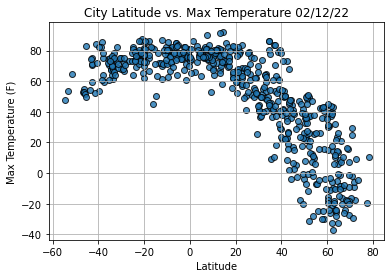

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

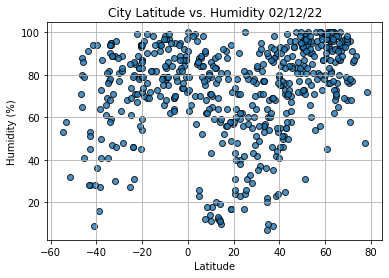

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

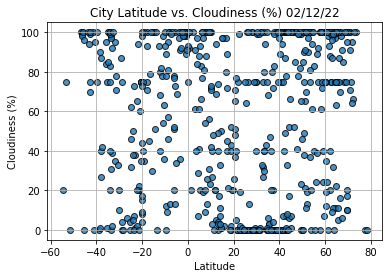

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

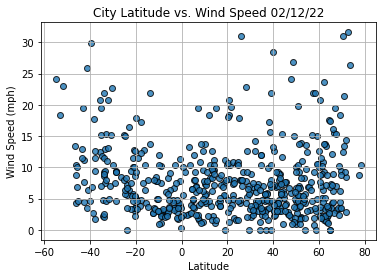

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Oktyabrskoye,RU,2022-02-12 23:34:21,43.0645,44.7417,26.74,93,7,8.95
5,Hilo,US,2022-02-12 23:34:22,19.7297,-155.0900,80.33,57,20,10.36
7,Batagay,RU,2022-02-12 23:34:23,67.6333,134.6333,-24.12,93,85,3.22
8,Ekhabi,RU,2022-02-12 23:34:24,53.5102,142.9671,12.16,90,81,8.28
10,Sangar,RU,2022-02-12 23:34:24,63.9242,127.4739,-25.15,99,100,3.33


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

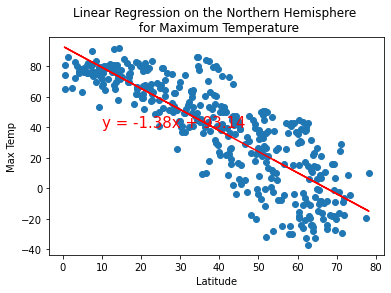

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

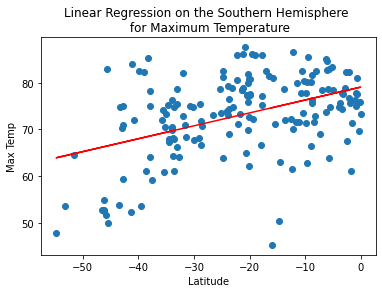

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

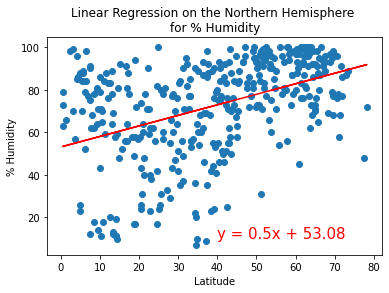

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity', (40,10))

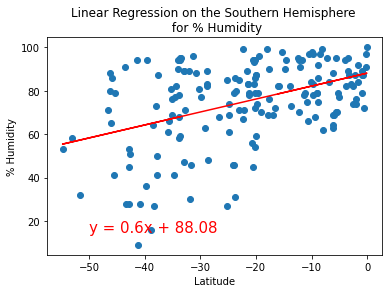

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50,15))

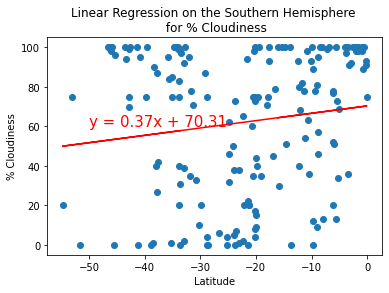

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

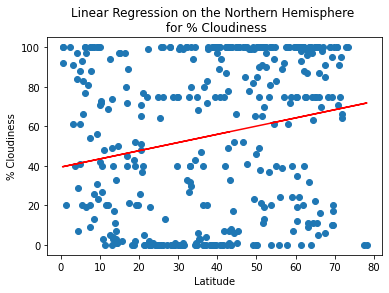

In [34]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

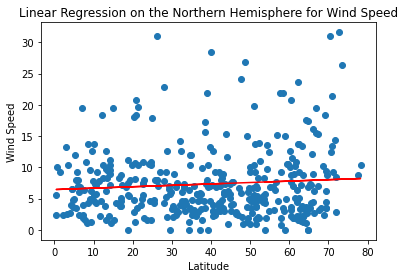

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (40,35))

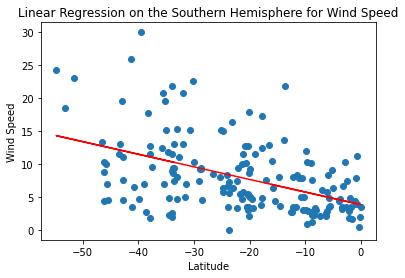

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))